# Gradient of Image

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [3]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [5]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [7]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = I0.mean(axis=2)
    
num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [9]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

max = np.max(I)
min = np.min(I)
I = (I-min)/(max-min)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [11]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_new = np.zeros(I.shape)
    for i in range(num_row):
         for j in range(num_column):
              if (i == num_row-1):
                   I_new[i][j] = I[i][j]
              else : I_new[i][j] = I[i+1][j]
   
    D = I_new-I
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [17]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_new = np.zeros(I.shape)
    for i in range(num_row):
         for j in range(num_column):
              if (i == 0):
                   I_new[i][j] = I[i][j]
              else : I_new[i][j] = I[i-1][j]
   
    D = I-I_new
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [43]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_new1 = np.zeros(I.shape)
    I_new2 = np.zeros(I.shape)
    for i in range(num_row):
        for j in range(num_column):
            if (i == 0):
                I_new1[i][j] = I[i+1][j]
                I_new2[i][j] = I[i][j]
            elif (i == num_row-1):
                I_new1[i][j] = I[i][j]
                I_new2[i][j] = I[i-1][j]
            else :
                I_new1[i][j]= I[i+1][j]
                I_new2[i][j]= I[i-1][j]
    
    
    D = (1/2)*(I_new1-I_new2) 
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [45]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    I_new = np.zeros(I.shape)
    for j in range(num_column):
         for i in range(num_row):
              if (j == num_column-1):
                   I_new[i][j] = I[i][j]
              else : I_new[i][j] = I[i][j+1]
   
    D = I_new-I
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [46]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_new = np.zeros(I.shape)
    for j in range(num_column):
         for i in range(num_row):
              if (j == 0):
                   I_new[i][j] = I[i][j]
              else : I_new[i][j] = I[i][j-1]
   
    D = I-I_new

    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [47]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    I_new1 = np.zeros(I.shape)
    I_new2 = np.zeros(I.shape)
    for j in range(num_column):
        for i in range(num_row):
            if (j == 0):
                I_new1[i][j] = I[i][j+1]
                I_new2[i][j] = I[i][j]
            elif (j == num_column-1):
                I_new1[i][j] = I[i][j]
                I_new2[i][j] = I[i][j-1]

            else:
                I_new1[i][j]= I[i][j+1]
                I_new2[i][j]= I[i][j-1]
    
    D = (1/2)*(I_new1-I_new2)  
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [48]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Ix = np.zeros(I.shape)

    I_new1 = np.zeros(I.shape)
    I_new2 = np.zeros(I.shape)
    for i in range(num_row):
        for j in range(num_column):
            if (i == 0):
                I_new1[i][j] = I[i+1][j]
                I_new2[i][j] = I[i][j]
            elif (i == num_row-1):
                I_new1[i][j] = I[i][j]
                I_new2[i][j] = I[i-1][j]

            else:
                I_new1[i][j]= I[i+1][j]
                I_new2[i][j]= I[i-1][j]
    
    Ix = (1/2)*(I_new1-I_new2)   

    Iy = np.zeros(I.shape)

    I_new3 = np.zeros(I.shape)
    I_new4 = np.zeros(I.shape)
    for j in range(num_column):
        for i in range(num_row):
            if (j == 0):
                I_new3[i][j] = I[i][j+1]
                I_new4[i][j] = I[i][j]
            elif (j == num_column-1):
                I_new3[i][j] = I[i][j]
                I_new4[i][j] = I[i][j-1]

            else: 
                I_new3[i][j]= I[i][j+1]
                I_new4[i][j]= I[i][j-1]
    
    Iy = (1/2)*(I_new3-I_new4) 

    norm_gradient = (Ix**2 + Iy**2)**(1/2)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [49]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [50]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [51]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [52]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [53]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [54]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [55]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [56]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [57]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [58]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [59]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [60]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [61]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [62]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [63]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [64]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [65]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


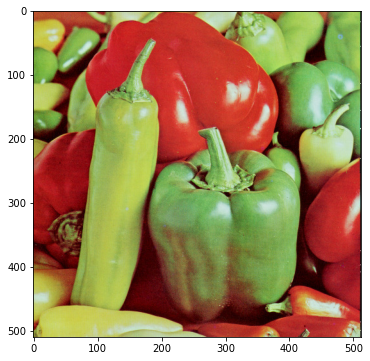

**************************************************
## [RESULT 02]
**************************************************


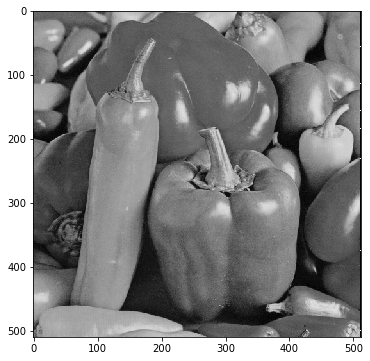

**************************************************
## [RESULT 03]
**************************************************


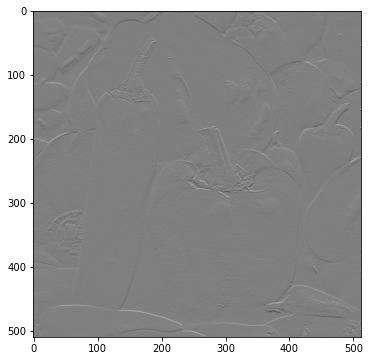

**************************************************
## [RESULT 04]
**************************************************


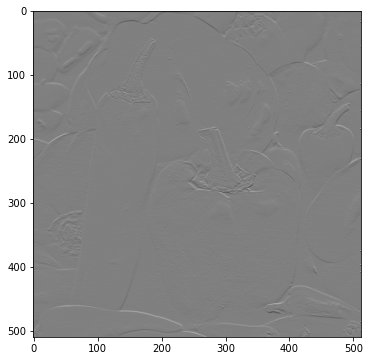

**************************************************
## [RESULT 05]
**************************************************


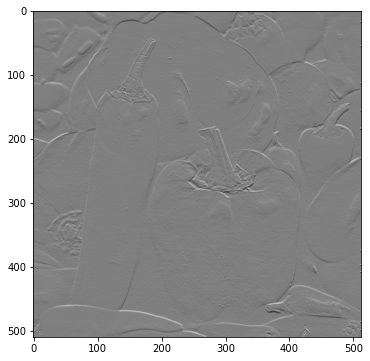

**************************************************
## [RESULT 06]
**************************************************


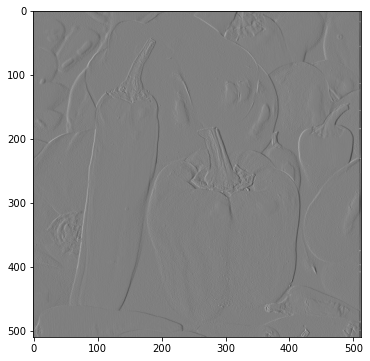

**************************************************
## [RESULT 07]
**************************************************


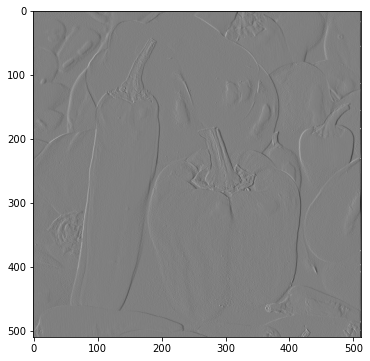

**************************************************
## [RESULT 08]
**************************************************


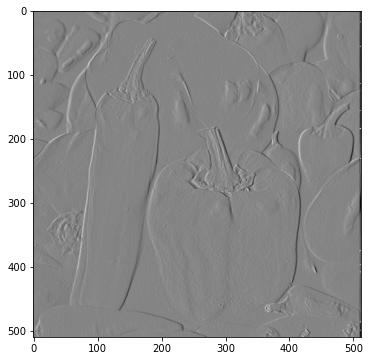

**************************************************
## [RESULT 09]
**************************************************


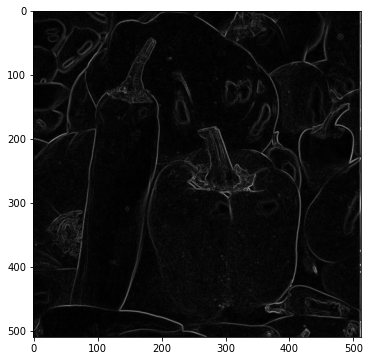

**************************************************
## [RESULT 10]
**************************************************


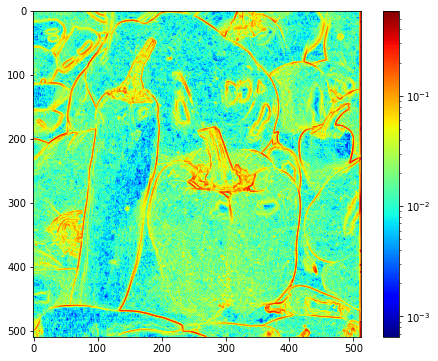

**************************************************
## [RESULT 11]
**************************************************
value1 =  -0.007853403141361293
value2 =  0.0
value3 =  -0.005235602094240788
value4 =  0.011780104712041939
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  0.002617801047120419
value3 =  0.015706806282722474
value4 =  -0.013089005235602136
**************************************************
## [RESULT 13]
**************************************************
value1 =  -0.003926701570680646
value2 =  0.0013089005235602095
value3 =  0.005235602094240843
value4 =  -0.0006544502617800985
**************************************************
## [RESULT 14]
**************************************************
value1 =  -0.03534031413612565
value2 =  0.0
value3 =  -0.01701570680628267
value4 =  0.0
**************************************************
## [RESULT 15]
*******************************

In [66]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)